# Experiment: Map vs. List Comprehension vs Lambda List Comprehension

Compare the computation time of algorithmns able to do elementwise mathematical operations on arbitrarily shaped lists.

Author: rdraschwandtner

https://github.com/rdraschwandtner/listoperations/blob/master/PerformanceComparisonExperiment.ipynb

## A. Setup

In [1]:
import operator
import functools
import numpy as np
import pandas as pd
import timeit

In [2]:
a = [ 1,  2,  3,  4, [ 5,  6,  7,  8]]
b = [10, 20, 30, 40, [50, 60, 70, 80]]

depth_fact = 500

In [3]:
def appendlst_toelemoflst(lst): 
    return list(map(lambda el:[el,lst], lst)) 

def appendlst_toaslastelem(orig, lst):
    appendlst_toaslastelem(orig[-1], lst) if type(orig[-1]) == list else orig.append(lst)
    return None

In [4]:
def count_numoflists(lst, list_cnt = 0):
    for elem in lst:
        if type(elem) == list:
            list_cnt = count_numoflists(elem, list_cnt +1)
    return list_cnt

print('# of lists: ' + str(count_numoflists(a)))

# of lists: 1


### A.1. Map fct

In [5]:
def elementwise_map_listoperation_wrapper(lhs, rhs, op):
    # bind operator-function to function call. Functions are not iterable, so map() would throw an error.
    return list(map(functools.partial(listoperation,op=op), lhs, rhs)) # https://stackoverflow.com/questions/10314859/applying-map-for-partial-argument

def listoperation(lhs, rhs, op):
    if type(lhs) == list:
        return elementwise_map_listoperation_wrapper(lhs, rhs, op)
    else:
        return lhs + rhs

In [6]:
timeit.timeit('elementwise_map_listoperation_wrapper(a, b, operator.add)', globals=globals(), number=1)

1.7673999536782503e-05

### A.2. Fct List comprehension
https://stackoverflow.com/a/57615641/11963667

In [7]:
def element_wise_lstcompfct(a, b, f):
    return [element_wise_lstcompfct(i, j, f) if type(i) == list and type(j) == list else f(i, j) for i, j in zip(a, b)]

In [8]:
timeit.timeit('element_wise_lstcompfct(a, b, operator.add)', globals=globals(), number=1)

1.4315999578684568e-05

### A.3. Lambda list comprehension

In [9]:
element_wise_lstcomplambda = lambda lhs, rhs, op: [element_wise_lstcomplambda(i,j,op) if type(i)==list and type(j) == list else op(i,j) for i, j in zip(lhs, rhs)]

In [10]:
timeit.timeit('element_wise_lstcomplambda(a, b, operator.add)', globals=globals(), number=1)

1.4208999346010387e-05

## B.Trial

Setup:
1. 3 groups: elementwise_map_listoperation_wrapper(), element_wise_lstcompfct(), element_wise_lstcomplambda()
2. multiple measurement: increasing # of lists
3. repeats: no repeats as each algo is executed under different "external" conditions
4. replicates/ multi run: n_repeats
5. dependent variable(s): execution time
6. independent variable(s): # of lists

In [11]:
n_repeats = 50
result_df = pd.DataFrame()
for level in range(depth_fact):   
    tmp_df = pd.DataFrame()
    tmp_df['num_of_lists'] = [count_numoflists(a)]
    
    times_map = timeit.repeat('elementwise_map_listoperation_wrapper(a, b, operator.add)', globals=globals(), number=1, repeat=n_repeats)
    tmp_df['mean_exectime_map'] = [np.mean(times_map)]
    tmp_df['min_exectime_map'] = [np.min(times_map)]
    tmp_df['max_exectime_map'] = [np.max(times_map)]
    tmp_df['median_exectime_map'] = [np.median(times_map)]
    tmp_df['times_map'] = [times_map]

    times_lstcompfct = timeit.repeat('element_wise_lstcompfct(a, b, operator.add)', globals=globals(), number=1, repeat=n_repeats)
    tmp_df['mean_exectime_lstcompfct'] = [np.mean(times_lstcompfct)]
    tmp_df['min_exectime_lstcompfct'] = [np.min(times_lstcompfct)]
    tmp_df['max_exectime_lstcompfct'] = [np.max(times_lstcompfct)]
    tmp_df['median_exectime_lstcompfct'] = [np.median(times_lstcompfct)]
    tmp_df['times_lstcompfct'] = [times_lstcompfct]

    times_lstcomplambda = timeit.repeat('element_wise_lstcomplambda(a, b, operator.add)', globals=globals(), number=1, repeat=n_repeats)
    tmp_df['mean_exectime_lstcomplambda'] = [np.mean(times_lstcomplambda)]
    tmp_df['min_exectime_lstcomplambda'] = [np.min(times_lstcomplambda)]
    tmp_df['max_exectime_lstcomplambda'] = [np.max(times_lstcomplambda)]
    tmp_df['median_exectime_lstcomplambda'] = [np.median(times_lstcomplambda)]
    tmp_df['times_times_lstcomplambda'] = [times_lstcomplambda]
    
    result_df = result_df.append(tmp_df,ignore_index=True)
    
    # make the lists deeper for the next round
    #a = appendlst_toelemoflst(a)
    #b = appendlst_toelemoflst(b)
    appendlst_toaslastelem(a,[9,9,9,9])
    appendlst_toaslastelem(b,[90,90,90,90])


## C. Results

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

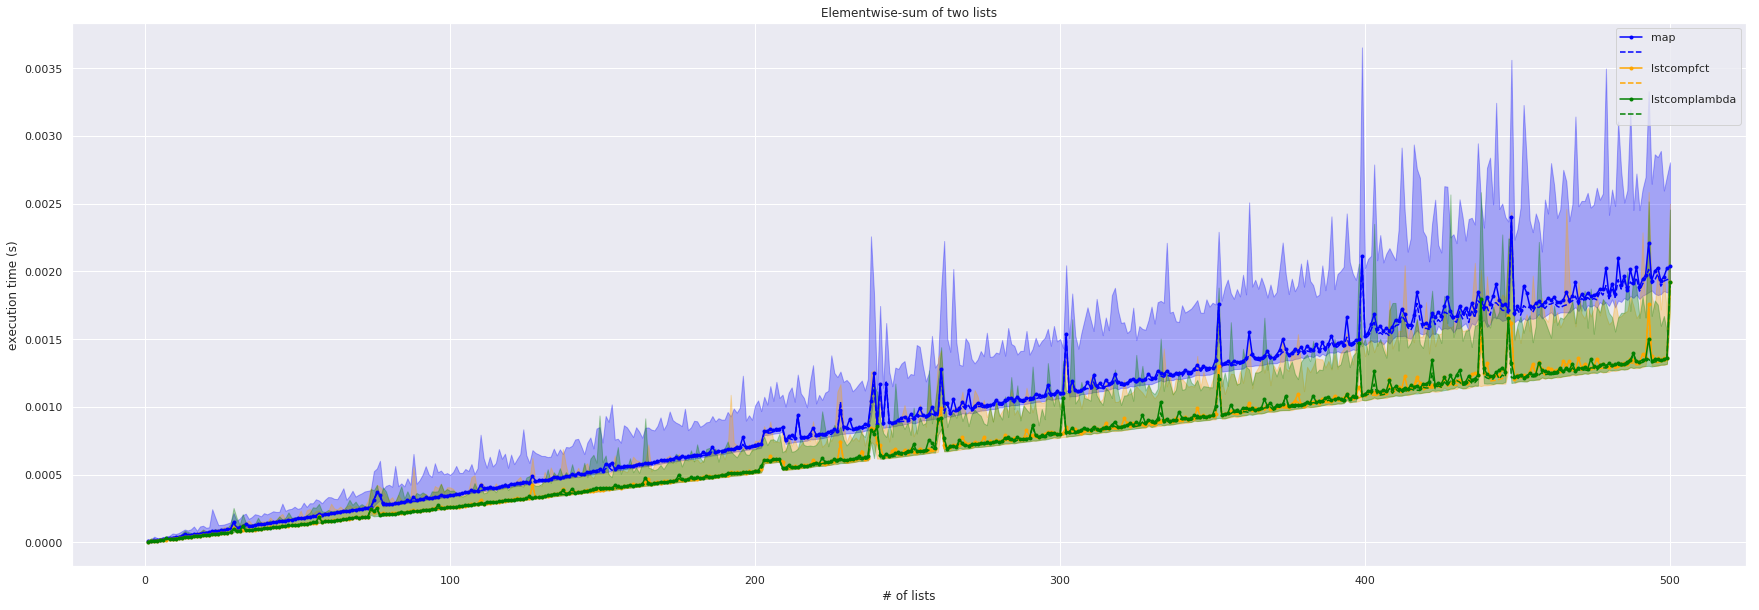

In [13]:
plt.figure(figsize=(30,10))
plt.plot(result_df['num_of_lists'], result_df['mean_exectime_map'],marker='.', color='blue')
plt.plot(result_df['num_of_lists'], result_df['median_exectime_map'],linestyle='--',color='blue')
plt.fill_between(result_df['num_of_lists'],result_df['min_exectime_map'],result_df['max_exectime_map'], alpha = 0.3,color='blue')
plt.plot(result_df['num_of_lists'], result_df['mean_exectime_lstcompfct'],marker='.',color='orange')
plt.plot(result_df['num_of_lists'], result_df['median_exectime_lstcompfct'],linestyle='--',color='orange')
plt.fill_between(result_df['num_of_lists'],result_df['min_exectime_lstcompfct'],result_df['max_exectime_lstcompfct'], alpha = 0.3,color='orange')
plt.plot(result_df['num_of_lists'], result_df['mean_exectime_lstcomplambda'],marker='.',color='green')
plt.plot(result_df['num_of_lists'], result_df['median_exectime_lstcomplambda'],linestyle='--',color='green')
plt.fill_between(result_df['num_of_lists'],result_df['min_exectime_lstcomplambda'],result_df['max_exectime_lstcomplambda'], alpha = 0.3,color='green')
plt.xlabel('# of lists')
plt.ylabel('execution time (s)')
plt.legend(['map','','lstcompfct','','lstcomplambda',''])
plt.title('Elementwise-sum of two lists')
plt.show()

Text(0.5, 1.0, 'Log-Log Elementwise-sum of two lists')

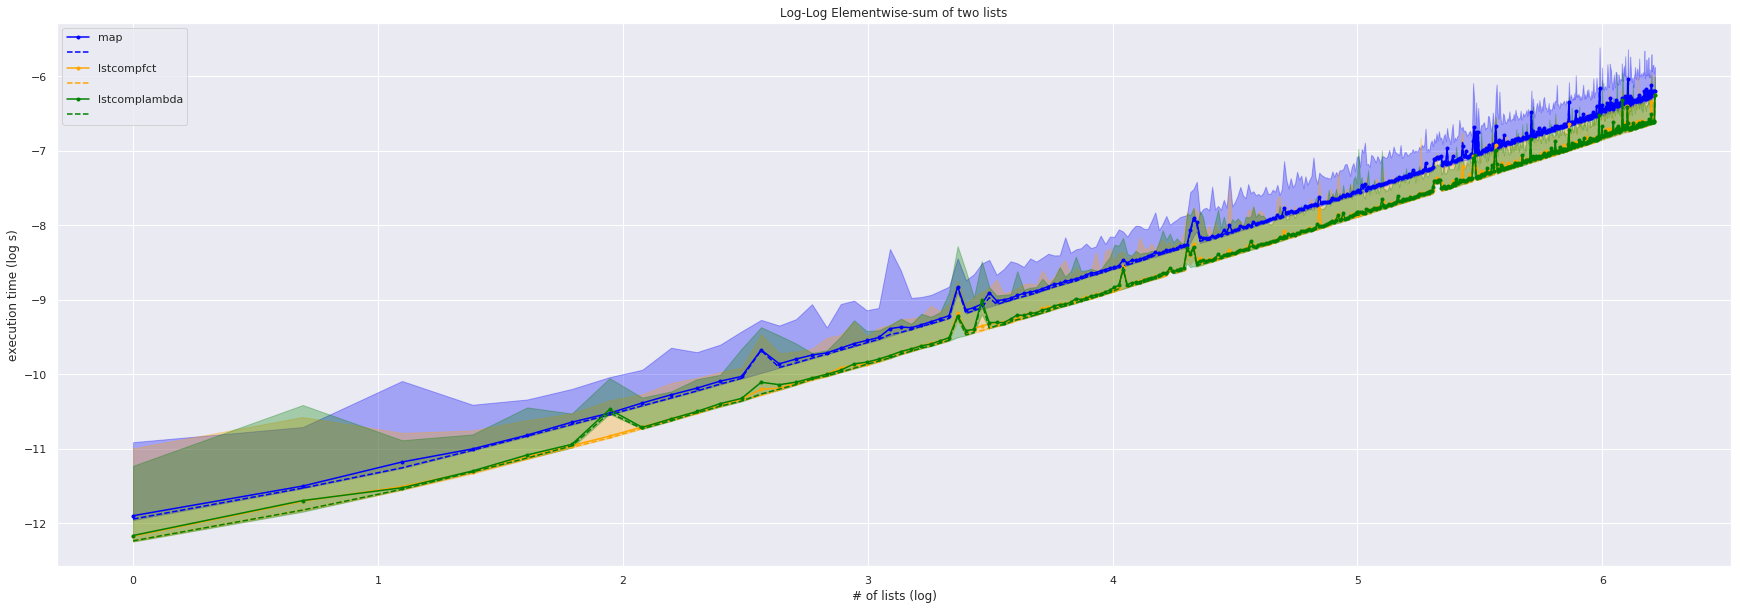

In [14]:
plt.figure(figsize=(30,10))
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['mean_exectime_map']),marker='.', color='blue')
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['median_exectime_map']),linestyle='--',color='blue')
plt.fill_between(np.log(result_df['num_of_lists']),np.log(result_df['min_exectime_map']),np.log(result_df['max_exectime_map']), alpha = 0.3,color='blue')
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['mean_exectime_lstcompfct']),marker='.',color='orange')
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['median_exectime_lstcompfct']),linestyle='--',color='orange')
plt.fill_between(np.log(result_df['num_of_lists']),np.log(result_df['min_exectime_lstcompfct']),np.log(result_df['max_exectime_lstcompfct']), alpha = 0.3,color='orange')
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['mean_exectime_lstcomplambda']),marker='.',color='green')
plt.plot(np.log(result_df['num_of_lists']), np.log(result_df['median_exectime_lstcomplambda']),linestyle='--',color='green')
plt.fill_between(np.log(result_df['num_of_lists']),np.log(result_df['min_exectime_lstcomplambda']),np.log(result_df['max_exectime_lstcomplambda']), alpha = 0.3,color='green')
plt.xlabel('# of lists (log)')
plt.ylabel('execution time (log s)')
plt.legend(['map','','lstcompfct','','lstcomplambda',''])
plt.title('Log-Log Elementwise-sum of two lists')

In log-log plot one can see that maximum execution times of lstcompfct and lstcomplambda are higher than the map algorithmn.

Average, minimum and maximum values of each repitition are shown.
One can see that map is slower than lstcompfct and lstcomplambda.
There is no visible difference between lstcompfct and lstcomplambda.

### C.1. Is there a significant difference between the algorithms?

[Biostatistics Series Module 3: Comparing Groups: Numerical Variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4885176/)

https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/


Each of the algorithmns are generated differently, hence comporaning those is "unpaired". (Between-group)
Each of the algorithmns contain are repeatadly measured, thus  comparing those is a "paired" instance. (Within-group)


[Statistical Comparisons of Classifiers over Multiple Data Sets](http://www.jmlr.org/papers/v7/demsar06a.html):
> 3.2.3 CONSIDERING MULTIPLE REPETITIONS OF EXPERIMENTS
> In our examples we have used AUCs measured and averaged over repetitions of training/testing
> episodes. For instance, each cell in Table 6 represents an average over five-fold cross validation.
> Could we also consider the variance, or even the results of individual folds?
> There are variations of the ANOVA and the Friedman test which can consider multiple observations per cell provided that the observations are independent (Zar, 1998). This is not the case here,
> since training data in multiple random samples overlaps. We are not aware of any statistical test that
> could take this into account.

This means that we need to summarize the replicates first. -> Median
Afterwards, we can check normality and then choose a test.

### C.1.I Normality on varying # lists per algorithmn?

No need to check, as with increasing # lists, the execution time increases. It is not possible to have a normal distribution here per design of the experiment. **Thus, no need to check for normality. -> non-parametric**

Use QQ-plot and Kolmogrov Smirnov test to check for normality, see also https://www.kaggle.com/brunocomitre/kolmogorov-smirnov-test-nonparametric-hypothesis

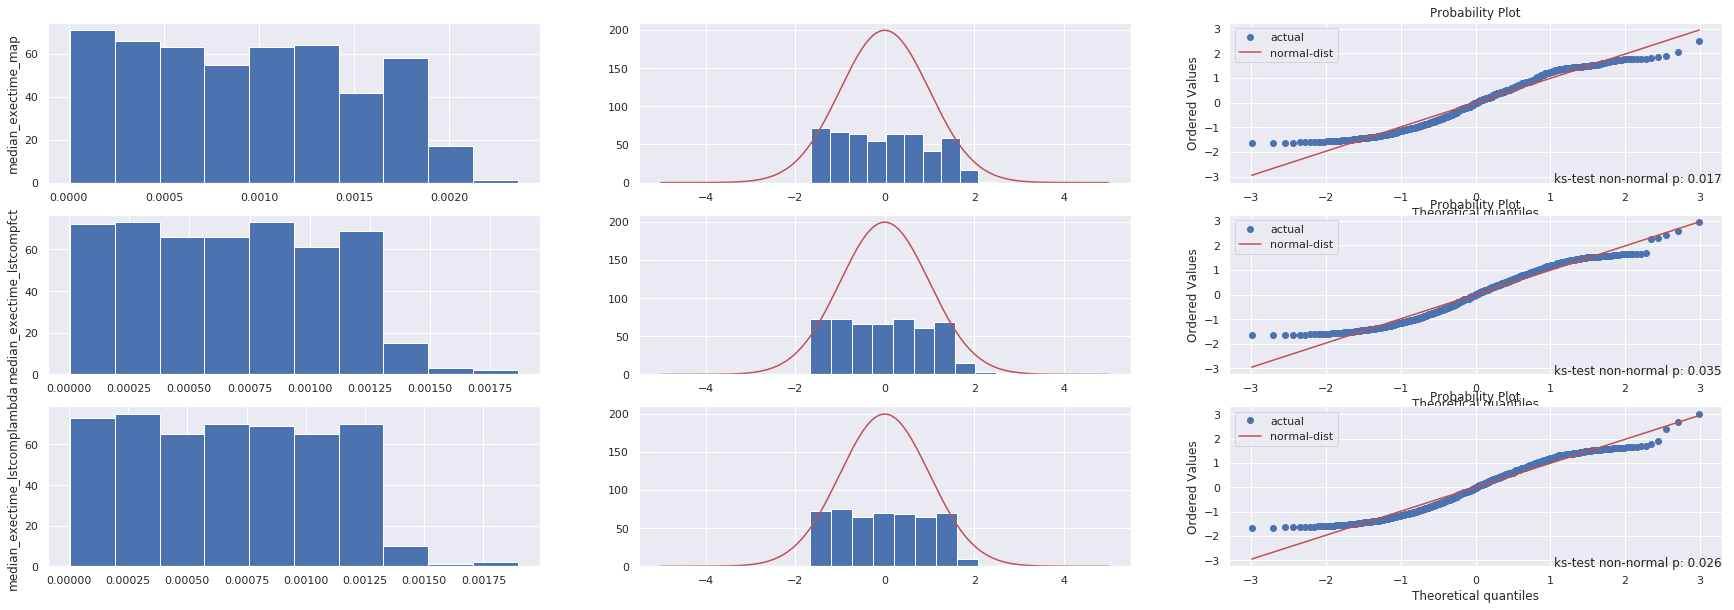

In [15]:
import scipy.stats as stats

tmp_algo_name_avgs = ['median_exectime_map','median_exectime_lstcompfct', 'median_exectime_lstcomplambda']
conv_cnter = 1
plt.figure(figsize=(30,10))

for tmp_algo_name_avg in tmp_algo_name_avgs:
    vals = result_df[tmp_algo_name_avg].copy()
    z = (vals-np.mean(vals))/np.std(vals) # standardize normal distribution
    plt.subplot(3,3,conv_cnter)
    plt.hist(vals)
    plt.ylabel(tmp_algo_name_avg)
    plt.subplot(3,3,conv_cnter+1)
    plt.hist(z)
    # plot standard normal distribution
    x = np.linspace(-5, 5, 1000)
    # scale up - normal distribution gives values between 0-1 -> we plot a count, 
    # so we need to scale it up wiht the number of list elements
    p = stats.norm.pdf(x, 0, 1) * len(vals)
    plt.plot(x, p, 'r')
    #plt.plot(z,fit)
    plt.subplot(3,3,conv_cnter+2)
    stats.probplot(z, dist="norm", plot=plt)
    plt.legend(['actual','normal-dist'])
    
    alpha = 0.05
    _, p_val = stats.kstest(z, 'norm') # H0: identical distributions - the sample (z) is coming from a normal distribution
    is_norm = 'non-normal' if p_val < alpha else 'normal'
    plt.text(max(plt.xlim()), min(plt.ylim()), 'ks-test ' + is_norm + ' p: '+ '{:.3f}'.format(p_val),horizontalalignment='right')
    conv_cnter += 3

plt.show()


### C.1.II Kruskal-Wallis H Test

H0: All data samples were drawn from the same distribution

In [16]:
from scipy.stats import kruskal

stat, p = kruskal(result_df['median_exectime_map'], result_df['median_exectime_lstcompfct'], result_df['median_exectime_lstcomplambda'])
#stat, p = kruskal(result_df['median_exectime_map'], result_df['median_exectime_lstcompfct'])
print('Statistics=%.3f, p_val=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0), no significant difference between any of the algorithmns')
else:
    print('Different distributions (reject H0), at least one of the algorithms is different')

Statistics=67.402, p_val=0.000
Different distributions (reject H0), at least one of the algorithms is different


We can see that there a difference in the algorithmn execution times, but which one(s) are different?

## C.1.III Dunn's post hoc test

https://stats.stackexchange.com/questions/25815/post-hoc-tests-after-kruskal-wallis-dunns-test-or-bonferroni-corrected-mann-wh

https://github.com/maximtrp/scikit-posthocs

p_value adjustment:

https://www.youtube.com/watch?v=rMuNniCTsOw

https://www.youtube.com/watch?v=kpTvTyMcDqY

In [17]:
!pip install scikit-posthocs
import scikit_posthocs as sp

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa06c724b38>,
 <matplotlib.colorbar.ColorbarBase at 0x7fa06c7b2588>)

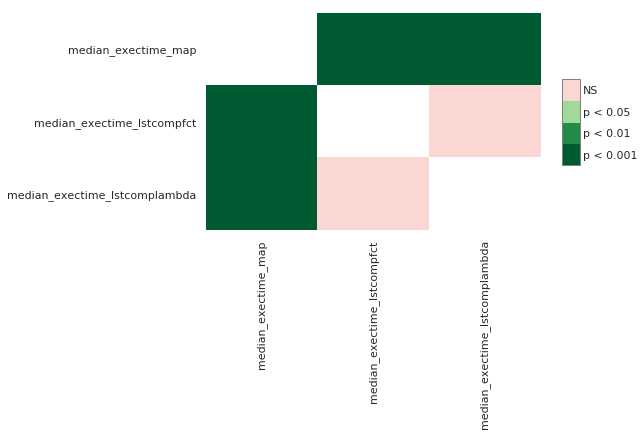

In [18]:
res = sp.posthoc_dunn([result_df['median_exectime_map'], result_df['median_exectime_lstcompfct'], result_df['median_exectime_lstcomplambda']],p_adjust='bonferroni')
res.rename(columns={1:'median_exectime_map', 2:'median_exectime_lstcompfct', 3:'median_exectime_lstcomplambda'}, 
                 index={1:'median_exectime_map',2:'median_exectime_lstcompfct', 3:'median_exectime_lstcomplambda'}, 
                 inplace=True)
sp.sign_plot(res)

executiontime_map can be observed to be slower than the other two algorithms. The Dunn's test shows that there is a significant difference between median_executiontime_map <-> median_exectime_lstcompfct and median_executiontime_map <-> median_exectime_lstcomplambda, but not between median_executiontime_map <-> median_exectime_lstcomplambda.

Hence we can draw following conclusions:
1. **map alogrithm is slower than lstcompfct and lstcomplambda**
2. **There is no difference in execution time between lstcompfct and lstcomplambda algorithms**

## D. Appendix

In [19]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.3.1
alembic==1.0.11
allennlp==0.8.4
altair==3.2.0
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
annoy==1.15.2
appdirs==1.4.3
arrow==0.14.5
asn1crypto==0.24.0
astor==0.8.0
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
Baker==1.3
basemap==1.2.0
bayesian-optimization==1.0.2
bayespy==0.5.18
bcolz==1.2.1
beautifulsoup4==4.8.0
biopython==1.74
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
blis==0.2.4
blist==1.3.6
bokeh==1.3.4
Boruta==0.3
boto==2.49.0
boto3==1.9.212
botocore==1.12.212
Bottleneck==1.2.1
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper
branca==0.3.1
brewer2mpl==1.4.1
cachetools==3.1.1
cairocffi==1.0.2
CairoSVG==2.4.1
Cartopy==0.17.0
cat

In [20]:
import platform
platform.uname()

uname_result(system='Linux', node='00a74417d8b9', release='4.9.0-8-amd64', version='#1 SMP Debian 4.9.144-3.1 (2019-02-19)', machine='x86_64', processor='')